In [2]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow import keras
import PIL 


img_height = 256
img_width = 256

In [ ]:
ds_train= tf.keras.preprocessing.image_dataset_from_directory(
    'images',
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    shuffle=True,
    seed = 123,
    validation_split=0.1,
    subset="training",
    batch_size=28

    # image_size=(img_height,img_width)

)

ds_val= tf.keras.preprocessing.image_dataset_from_directory(
    'images',
    labels="inferred",
    color_mode="grayscale",
    shuffle=True,
    seed = 123,
    validation_split=0.1,
    subset="validation",
    # image_size=(img_height,img_width)
    batch_size=28
    
    
)



for image_batch, labels_batch in ds_train:
    print(image_batch.shape)
    print(labels_batch.shape)
    i=0
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.colorbar()
    plt.grid(False)
    plt.show()
    print(labels_batch[i])
    break





In [4]:
def augment(x,y):
    image = tf.image.random_brightness(x,max_delta=0.05)
    return image,y

ds_train = ds_train.map(augment)




(28, 256, 256, 1)
(28,)


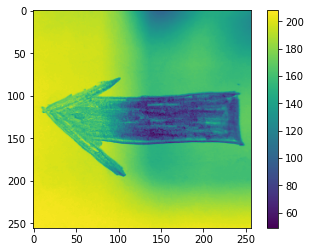

tf.Tensor(0, shape=(), dtype=int32)


In [5]:
for image_batch, labels_batch in ds_train:
    print(image_batch.shape)
    print(labels_batch.shape)
    i=20
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.colorbar()
    plt.grid(False)
    plt.show()
    print(labels_batch[i])
    break

In [44]:
model = keras.Sequential([
  keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
  keras.layers.Conv2D(5, 3, padding='same', activation='relu', input_shape=(256,256,1)),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(10, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(15, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer="Adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']    
)

model.fit(ds_train,epochs=10)

Epoch 1/10
69/69 [==============================] - 3s 30ms/step - loss: 0.7946 - accuracy: 0.6299
Epoch 2/10
69/69 [==============================] - 2s 29ms/step - loss: 0.2085 - accuracy: 0.9301
Epoch 3/10
69/69 [==============================] - 2s 29ms/step - loss: 0.1207 - accuracy: 0.9555
Epoch 4/10
69/69 [==============================] - 2s 31ms/step - loss: 0.0790 - accuracy: 0.9757
Epoch 5/10
69/69 [==============================] - 2s 29ms/step - loss: 0.0583 - accuracy: 0.9840
Epoch 6/10
69/69 [==============================] - 2s 30ms/step - loss: 0.0547 - accuracy: 0.9803
Epoch 7/10
69/69 [==============================] - 2s 29ms/step - loss: 0.0211 - accuracy: 0.9948
Epoch 8/10
69/69 [==============================] - 2s 30ms/step - loss: 0.0191 - accuracy: 0.9953
Epoch 9/10
69/69 [==============================] - 2s 30ms/step - loss: 0.0230 - accuracy: 0.9938
Epoch 10/10
69/69 [==============================] - 2s 29ms/step - loss: 0.0146 - accuracy: 0.9969


In [45]:
model.evaluate(ds_val)

8/8 [==============================] - 1s 47ms/step - loss: 0.2326 - accuracy: 0.9626


[0.23256690800189972, 0.9626168012619019]

(1, 256, 256, 1)
1/1 [==============================] - 0s 21ms/step


array([[1.018021e-04, 9.998982e-01, 8.027616e-10]], dtype=float32)

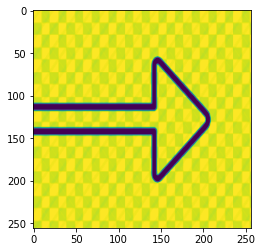

In [60]:
img = tf.keras.preprocessing.image.load_img('RIGHT.png')

image_array = tf.keras.preprocessing.image.img_to_array(img)

image_array = tf.image.rgb_to_grayscale(image_array)


image_array = tf.image.resize(image_array,(256,256))
image_array = tf.reshape(image_array,(1,256,256,1))

plt.imshow(image_array[0])

print(image_array.shape)

model.predict(image_array)